# **Đại học Tôn Đức Thắng**
Khoa Công nghệ thông tin
KHAI THÁC DỮ LIỆU VÀ KHAI PHÁ TRI THỨC - 505043
---
    Thành viên:
      Nguyễn Sang Sinh - 51900771
      Trần Hoàng Đăng - 51800850
      Võ Thị Kiều Viễn Đông - 51800855

## **1. The Eclat alogrithm**

### Connect Google Drive & Import Libs

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import csv

import requests
from bs4 import BeautifulSoup
import os
import matplotlib.pyplot as plt

In [ ]:
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Massive Dataset Mining/Data

/content/drive/MyDrive/Massive Dataset Mining/Data


### Load Data

In [ ]:
data = pd.read_csv('store_data.csv', header=None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Get data values to Eclat 
#Get 200 values
data_test = data.values[500:700]

In [ ]:
#Data shape
data_test.shape

(200, 20)

### Data Processing for Eclat

In [ ]:
#Remove NaN data & Convert values to Array
result = []
temp = []
for i in range(data_test.shape[0]):
  for j in range(data_test.shape[1]):
    if str(data_test[i,j]) != 'nan':
      temp.append(str(data_test[i,j]))
  result.append(temp)
  temp = []

In [ ]:
result[:10]

[['chicken', 'chocolate', 'cookies'],
 ['low fat yogurt'],
 ['eggs', 'cake', 'low fat yogurt'],
 ['shrimp',
  'spaghetti',
  'mineral water',
  'soup',
  'milk',
  'bramble',
  'frozen smoothie',
  'cottage cheese'],
 ['mineral water', 'eggs', 'protein bar'],
 ['turkey', 'shrimp', 'meatballs', 'butter', 'eggs', 'salad', 'green tea'],
 ['fresh tuna',
  'spaghetti',
  'chocolate',
  'olive oil',
  'chicken',
  'french fries'],
 ['turkey', 'shrimp', 'escalope', 'hot dogs'],
 ['burgers', 'pepper', 'soup', 'milk', 'pancakes', 'green tea'],
 ['pancakes']]

In [ ]:
#Get P 1-itemsets
P = {}
count_tid = 0
for trans in result:
  for item in trans:
    if item in P:
      P[item].append(count_tid) 
    else:
      P[item] = [count_tid]
  count_tid+=1

In [ ]:
#Print 10 itemset first
count = 0
for itemset in P.items():
  if (count < 10):
    print(itemset)
    count += 1
  else:
    break

('chicken', [0, 6, 18, 22, 24, 94, 110, 114, 147, 153, 158, 175, 179, 183, 190, 199])
('chocolate', [0, 6, 15, 27, 38, 39, 45, 46, 48, 50, 51, 65, 66, 70, 74, 80, 97, 102, 103, 120, 121, 125, 127, 130, 131, 133, 137, 138, 146, 147, 155, 159, 171, 175, 180, 182, 188, 193, 194])
('cookies', [0, 39, 41, 56, 59, 72, 81, 95, 98, 119, 124, 136, 152, 166, 176])
('low fat yogurt', [1, 2, 11, 23, 38, 43, 53, 54, 55, 70, 84, 101, 108, 126, 138, 140, 143, 146, 154, 156, 161, 168, 179, 182, 195])
('eggs', [2, 4, 5, 10, 11, 13, 17, 22, 24, 25, 29, 31, 34, 37, 41, 42, 47, 49, 55, 59, 60, 61, 62, 63, 65, 68, 69, 70, 71, 74, 77, 84, 89, 92, 95, 101, 105, 108, 110, 113, 122, 125, 126, 130, 133, 134, 140, 154, 156, 158, 161, 166, 173, 182, 188, 191, 196, 197, 198])
('cake', [2, 18, 20, 22, 26, 48, 67, 68, 87, 129, 145, 146, 156, 173, 199])
('shrimp', [3, 5, 7, 65, 110, 120, 133, 156, 159, 162, 164, 166, 175, 194, 197, 199])
('spaghetti', [3, 6, 13, 24, 28, 40, 50, 52, 53, 74, 76, 82, 96, 100, 103, 109, 

In [ ]:
#Filtering itemset < minsup
minsup = 3
for key, value in list(P.items()):
  if (len(value) < minsup):
    del P[key]

In [ ]:
#Print itemset after filtering
P.items()

dict_items([('chicken', [0, 6, 18, 22, 24, 94, 110, 114, 147, 153, 158, 175, 179, 183, 190, 199]), ('chocolate', [0, 6, 15, 27, 38, 39, 45, 46, 48, 50, 51, 65, 66, 70, 74, 80, 97, 102, 103, 120, 121, 125, 127, 130, 131, 133, 137, 138, 146, 147, 155, 159, 171, 175, 180, 182, 188, 193, 194])

### Eclat Algorithm

In [ ]:
#Union function
def Union_original(lst1, lst2):
  if (type(lst1) == str):
    lst = [lst1] + [lst2]
  else:
    lst = lst1 + lst2
  return list(set(lst))

In [ ]:
#Intersection function
def Intersection(lst1, lst2 ):
    return [value for value in lst1 if value in lst2]

In [ ]:
#Eclat function
def Eclat(P, minsup, F):
  index_a = 1
  for Xa, tXa in P.items():
    index_b = 0
    F.append([(Xa), tXa, len(tXa)])
    Pa = {}
    for Xb, tXb in P.items():
      index_b += 1
      if (index_b > index_a):
        Xab = Union_original(Xa,Xb)
        tXab = Intersection(tXa, tXb)
        if (len(tXab) > minsup):
          Pa[tuple(Xab)] = tXab
    index_a += 1
    if (len(Pa) != 0):
      Eclat(Pa, minsup, F)
  return F

In [ ]:
F = [] #Initial F
minsup = 2 #Initial minsup
Associate_Itemset = Eclat(P,minsup,F)

In [ ]:
#Print result
for i in Associate_Itemset:
  print(i)

['chicken', [0, 6, 18, 22, 24, 94, 110, 114, 147, 153, 158, 175, 179, 183, 190, 199], 16]
[('chicken', 'chocolate'), [0, 6, 147, 175], 4]
[('chicken', 'chocolate', 'olive oil'), [6, 147, 175], 3]
[('eggs', 'chicken'), [22, 24, 110, 158], 4]
[('chicken', 'cake'), [18, 22, 199], 3]
[('chicken', 'shrimp'), [110, 175, 199], 3]
[('chicken', 'shrimp', 'olive oil'), [110, 175, 199], 3]
[('spaghetti', 'chicken'), [6, 24, 114, 175, 179], 5]
[('mineral water', 'chicken'), [22, 147, 175, 179, 199], 5]
[('mineral water', 'chicken', 'olive oil'), [147, 175, 199], 3]
[('chicken', 'milk'), [22, 147, 153], 3]
[('chicken', 'fresh tuna'), [6, 22, 199], 3]
[('chicken', 'olive oil'), [6, 110, 147, 175, 183, 199], 6]
[('chicken', 'french fries'), [6, 22, 175], 3]
['chocolate', [0, 6, 15, 27, 38, 39, 45, 46, 48, 50, 51, 65, 66, 70, 74, 80, 97, 102, 103, 120, 121, 125, 127, 130, 131, 133, 137, 138, 146, 147, 155, 159, 171, 175, 180, 182, 188, 193, 194], 39]
[('low fat yogurt', 'chocolate'), [38, 70, 138, 146

## **2. Implement the crawling task**

### Crawling data

Hàm **scrape_stock_symbols** dùng để crawl dữ liệu từ trang web cafef.vn. 3 thông số truyền vào bao gồm:
  - name: mã chứng khoán của doanh nghiệp
  - category: loại kết quả hoạt động kinh doanh của doanh nghiệp đó
  - year: năm cần crawl để lấy dữ liệu
Các dữ liệu cần crawl bao gồm các quý trong năm cần lấy sẽ được thêm vào list **quarter** và các thông số dữ liệu của năm đó sẽ được thêm vào list **data**.

In [ ]:
def scrape_stock_symbols(name, category, year):
    URL = 'https://s.cafef.vn/bao-cao-tai-chinh/'+name+'/'+category+'/'+year+'/4/0/0/ket-qua-hoat-dong-kinh-doanh-cong-ty-co-phan-tap-doan-hoa-phat.chn'
    soup = BeautifulSoup(requests.get(URL).text, 'html.parser')
    strQuarter = soup.find_all('table', attrs={'id':'tblGridData'})
    strData = soup.find_all('table', attrs={'id':'tableContent'})
  
    for i in strQuarter:
        cols = i.find_all('td', attrs={'class':'h_t'})
        cols = [ele.text.strip() for ele in cols]
        quarter.append([ele for ele in cols if ele])
      
    for i in strData:
        cols = i.find_all('td', attrs={'class':'b_r_c'})
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele])
      
    return (quarter, data)

Hàm **data_to_csv** sẽ được dùng để chuyển đổi kết quả sang file csv. Thông số dữ liệu truyền vào bao gồm:
  - quarter: các quý trong năm cần crawl
  - data: dữ liệu kết quả kinh doanh
  - year: năm cần crawl
  - path: đường dẫn chưa file dữ liệu sau khi xử lý
  - name: tên doanh nghiệp
  - category: loại kết quả hoạt động kinh doanh

In [ ]:
def data_to_csv(quarter, data, year, path, name, category):
    quarter_len = 4
    if (year == '2021'):
        quarter_len = 3
    data_output = []
    data_row = []
    for i in data[0]:
        if ' ' in i:
          if len(data_row) > 2:
              data_output.append(data_row)
          data_row = []
          data_row.append(i)
        else:
            data_row.append(i)
    with open(path + name + '-' + category + '-' + year + '.csv', 'w+', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(list(['Thông số']) + quarter[0][:quarter_len])
        for i in data_output:
            writer.writerow(i)

Để lấy được dữ liệu, người dùng cần truyền vào khoảng thời gian cần lấy dữ liệu bao gồm năm bắt đầu và năm kết thúc lần lượt qua các biến **startYear** và **endYear**.

List **report** để chức các kết quả mà người dùng cần crawl. Trong đề tài này, chúng em cần crawl dữ liệu từ trang **Kết quả hoạt động kinh doanh** và **Cân đối kế toán** nên thông số truyền vào sẽ là **IncSta** và **BSheet**.
**name** là tên doanh nghiệp

Ví dụ:
https://s.cafef.vn/bao-cao-tai-chinh/HPG/IncSta/2021/4/0/0/ket-qua-hoat-dong-kinh-doanh-cong-ty-co-phan-tap-doan-hoa-phat.chn sẽ lấy kết quả hoạt động kinh doanh từ doanh nghiệp HPG trong năm 2021.

Sau khi có dữ liệu bao gồm tên doanh nghiệp, thể loại kết quả và năm thì dữ liệu sẽ được gửi đến các hàm **scarpe_stock_symbols** và **data_to_csv** để xử lý và in ra kết quả.


In [ ]:
startYear = 2018
endYear = 2021

report = ['IncSta' , 'BSheet']
name = 'HPG'

for category in report:
    if (category == 'IncSta'):
        output_path = 'Hoạt động kinh doanh/'
    else:
        output_path = 'Cân đối kế toán/'
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    for year in range(startYear, endYear+1):
        quarter = []
        data = []
        (quarter, data) = scrape_stock_symbols(name, category, str(year))
        data_to_csv(quarter, data, str(year), output_path, name, category)
print('Done!')

Done!


### Visualize

In [ ]:
#Đọc dữ liệu từ các file cần visualize
hdkd_2018 = pd.read_csv('/content/Hoạt động kinh doanh/HPG-IncSta-2018.csv', header=0)
hdkd_2019 = pd.read_csv('/content/Hoạt động kinh doanh/HPG-IncSta-2019.csv', header=0)
hdkd_2020 = pd.read_csv('/content/Hoạt động kinh doanh/HPG-IncSta-2020.csv', header=0)
hdkd_2021 = pd.read_csv('/content/Hoạt động kinh doanh/HPG-IncSta-2021.csv', header=0)

In [ ]:
#Read CSV Hoạt Động Kinh Doanh 2019
hdkd_2019

,Thông số,Quý 1-2019,Quý 2-2019,Quý 3-2019,Quý 4-2019
0,1. Doanh thu bán hàng và cung cấp dịch vụ,"15,179,972,721,712","15,330,983,908,774","15,349,518,976,186","18,282,088,440,464"
1,2. Các khoản giảm trừ doanh thu,"216,722,214,264","233,718,346,934","262,487,576,044","306,785,764,611"
2,3. Doanh thu thuần về bán hàng và cung cấp dịc...,"14,963,250,507,448","15,097,265,561,840","15,087,031,400,142","17,975,302,675,853"
3,4. Giá vốn hàng bán,"12,342,336,489,604","12,070,461,588,036","12,385,057,811,865","15,139,622,033,638"
4,5. Lợi nhuận gộp về bán hàng và cung cấp dịch vụ,"2,620,914,017,844","3,026,803,973,804","2,701,973,588,277","2,835,680,642,215"
5,6. Doanh thu hoạt động tài chính,"91,858,567,531","123,100,591,056","138,550,988,697","122,443,551,198"
6,7. Chi phí tài chính,"240,829,520,527","305,054,468,608","328,517,389,602","312,174,332,179"
7,- Trong đó: Chi phí lãi vay,"185,199,221,610","215,389,146,860","265,895,204,863","270,226,645,026"
8,9. Chi phí bán hàng,"192,602,494,567","269,462,575,465","226,510,475,946","184,758,038,710"
9,10. Chi phí quản lý doanh nghiệp,"121,634,447,535","105,833,495,534","150,483,484,286","191,052,158,467"


In [ ]:
#Read CSV Hoạt Động Kinh Doanh 2020
hdkd_2020

,Thông số,Quý 1-2020,Quý 2-2020,Quý 3-2020,Quý 4-2020
0,1. Doanh thu bán hàng và cung cấp dịch vụ,"19,451,060,972,271","20,694,235,681,263","24,968,612,501,405","26,165,172,616,887"
1,2. Các khoản giảm trừ doanh thu,"218,353,026,228","272,033,734,890","283,050,075,571","387,101,508,420"
2,3. Doanh thu thuần về bán hàng và cung cấp dịc...,"19,232,707,946,043","20,422,201,946,373","24,685,562,425,834","25,778,071,108,467"
3,4. Giá vốn hàng bán,"15,469,649,574,389","16,716,699,660,689","19,516,497,107,892","19,510,833,657,232"
4,5. Lợi nhuận gộp về bán hàng và cung cấp dịch vụ,"3,763,058,371,654","3,705,502,285,684","5,169,065,317,942","6,267,237,451,235"
5,6. Doanh thu hoạt động tài chính,"108,979,890,041","395,036,836,210","247,689,080,794","355,499,934,411"
6,7. Chi phí tài chính,"823,113,673,484","621,297,893,776","708,511,948,435","786,899,253,782"
7,- Trong đó: Chi phí lãi vay,"481,082,874,292","523,373,576,010","540,809,441,828","662,031,175,138"
8,8. Phần lãi lỗ hoặc lỗ trong công ty liên doan...,"-2,157,276,978","16,345,909,889","-5,495,008,340","-6,728,992,807"
9,9. Chi phí bán hàng,"257,877,328,351","259,293,030,237","294,052,388,783","283,146,891,052"


In [ ]:
#Xóa lãi lỗ của 2020-2021 (Đưa csv 4 năm về cùng format)
hdkd_2020.drop(index=hdkd_2020.index[8], axis=0, inplace=True)
hdkd_2021.drop(index=hdkd_2021.index[8], axis=0, inplace=True)

In [ ]:
# Lấy dữ liệu từ Doanh thu bán hàng và cung cấp dịch vụ
rev2018 = hdkd_2018[0:].iloc[0][1:]
rev2019 = hdkd_2019[0:].iloc[0][1:]
rev2020 = hdkd_2020[0:].iloc[0][1:]
rev2021 = hdkd_2021[0:].iloc[0][1:]

# Lấy dữ liệu từ Lợi nhuận sau thuế thu nhập doanh nghiệp
pro2018 = hdkd_2018[1:].iloc[16][1:]
pro2019 = hdkd_2019[1:].iloc[16][1:]
pro2020 = hdkd_2020[1:].iloc[16][1:]
pro2021 = hdkd_2021[1:].iloc[16][1:]

#pro dùng để hợp nhất các dữ liệu lợi nhuận của các năm
pro = [pro2018,pro2019,pro2020,pro2021]
pro = pd.concat(pro)

#rev dùng để hợp nhất các dữ liệu doanh thu của các năm
rev = [rev2018,rev2019,rev2020,rev2021]
rev = pd.concat(rev)

In [ ]:
pro_values = []
for i in pro.values:
  new = i.replace(',', '')
  pro_values.append(int(new))
  
rev_values = []
for i in rev.values:
  new = i.replace(',', '')
  rev_values.append(int(new))

In [ ]:
# Hàm lấy label từ số liệu
def addlabels (x,y):
    for i in range(len(x)):
      plt.text(i,y[i],y[i],horizontalalignment='center', verticalalignment='bottom',fontsize=10)

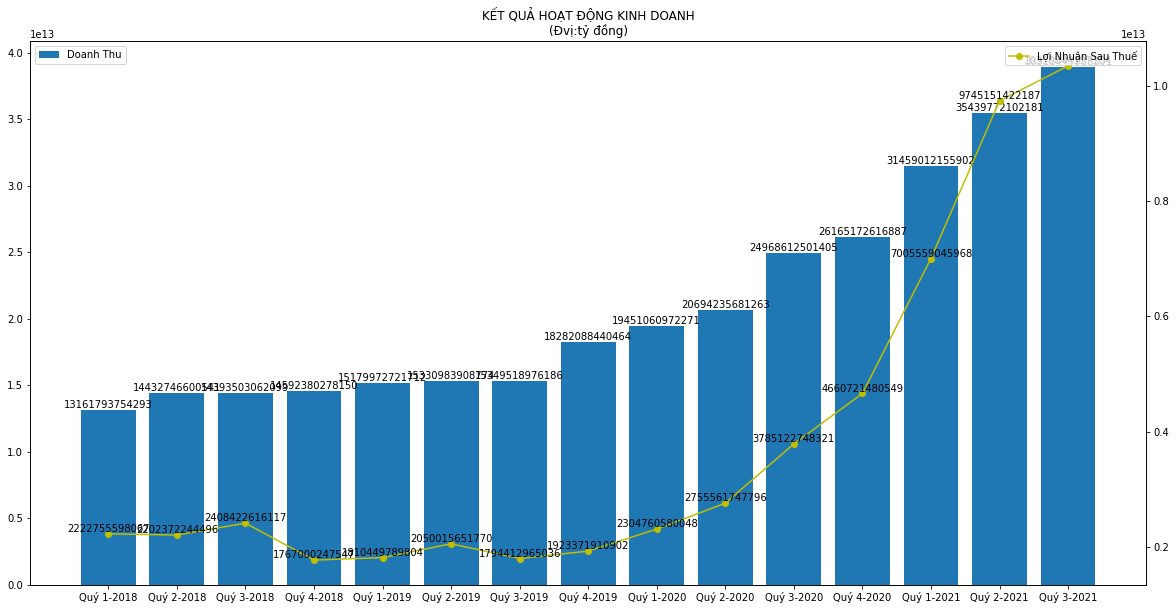

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(rev.keys(),rev_values)
addlabels(rev.keys(), rev_values)
plt.legend(['Doanh Thu'],loc=2)
plt.twinx()
plt.plot(pro.keys(), pro_values, color='y', marker='o')
addlabels(pro.keys(), pro_values)
plt.legend(['Lợi Nhuận Sau Thuế'],loc=1)
plt.title('KẾT QUẢ HOẠT ĐỘNG KINH DOANH\n(Đvị:tỷ đồng)')
plt.show()

## **3. Implement the crawling task**

### Visualize

In [ ]:
cdkt_2021 = pd.read_csv('/content/Cân đối kế toán/HPG-BSheet-2021.csv', error_bad_lines=False)
cdkt_2020 = pd.read_csv('/content/Cân đối kế toán/HPG-BSheet-2020.csv', error_bad_lines=False)
cdkt_2019 = pd.read_csv('/content/Cân đối kế toán/HPG-BSheet-2019.csv', error_bad_lines=False)
cdkt_2018 = pd.read_csv('/content/Cân đối kế toán/HPG-BSheet-2018.csv', error_bad_lines=False)

b'Skipping line 3: expected 4 fields, saw 8\n'
b'Skipping line 3: expected 5 fields, saw 10\n'
b'Skipping line 3: expected 5 fields, saw 10\n'
b'Skipping line 3: expected 5 fields, saw 10\n'


In [ ]:
#Lấy dữ liệu Tiền và các khoản tương đương tiền
data1_2018 = cdkt_2018[0:].iloc[1][1:]
data1_2019 = cdkt_2019[0:].iloc[1][1:]
data1_2020 = cdkt_2020[0:].iloc[1][1:]
data1_2021 = cdkt_2021[0:].iloc[1][1:]

#data1 dùng để hợp nhất các dữ liệu Tiền và các khoản tương đương tiền
data1 = [data1_2018,data1_2019,data1_2020,data1_2021]
data1 = pd.concat(data1)
data1_values = []
for i in data1.values:
  new = i.replace(',', '')
  data1_values.append(int(new))

#Lấy dữ liệu Các khoản đầu tư tài chính ngắn hạn
data2_2018 = cdkt_2018[0:].iloc[2][1:]
data2_2019 = cdkt_2019[0:].iloc[2][1:]
data2_2020 = cdkt_2020[0:].iloc[2][1:]
data2_2021 = cdkt_2021[0:].iloc[2][1:]

#data2 dùng để hợp nhất Các khoản đầu tư tài chính ngắn hạn
data2 = [data2_2018,data2_2019,data2_2020,data2_2021]
data2 = pd.concat(data2)
data2_values = []
for i in data2.values:
  new = i.replace(',', '')
  data2_values.append(int(new))

#Lấy dữ liệu Các khoản Các khoản phải thu ngắn hạn
data3_2018 = cdkt_2018[0:].iloc[4][1:]
data3_2019 = cdkt_2019[0:].iloc[4][1:]
data3_2020 = cdkt_2020[0:].iloc[4][1:]
data3_2021 = cdkt_2021[0:].iloc[4][1:]

#data3 dùng để hợp nhất  Các khoản Các khoản phải thu ngắn hạn
data3 = [data3_2018,data3_2019,data3_2020,data3_2021]
data3 = pd.concat(data3)
data3_values = []
for i in data3.values:
  new = i.replace(',', '')
  data3_values.append(int(new))

#Lấy dữ liệu Hàng tồn kho
data4_2018 = cdkt_2018[0:].iloc[10][1:]
data4_2019 = cdkt_2019[0:].iloc[10][1:]
data4_2020 = cdkt_2020[0:].iloc[10][1:]
data4_2021 = cdkt_2021[0:].iloc[10][1:]

#data4 dùng để hợp nhất Hàng tồn kho
data4 = [data4_2018,data4_2019,data4_2020,data4_2021]
data4 = pd.concat(data4)
data4_values = []
for i in data4.values:
  new = i.replace(',', '')
  data4_values.append(int(new))

#Lấy dữ liệu Tài sản ngắn hạn khác
data5_2018 = cdkt_2018[0:].iloc[13][1:]
data5_2019 = cdkt_2019[0:].iloc[13][1:]
data5_2020 = cdkt_2020[0:].iloc[13][1:]
data5_2021 = cdkt_2021[0:].iloc[13][1:]

#data5 dùng để hợp nhất Tài sản ngắn hạn khác
data5 = [data5_2018,data5_2019,data5_2020,data5_2021]
data5 = pd.concat(data5)
data5_values = []
for i in data5.values:
  new = i.replace(',', '')
  data5_values.append(int(new))


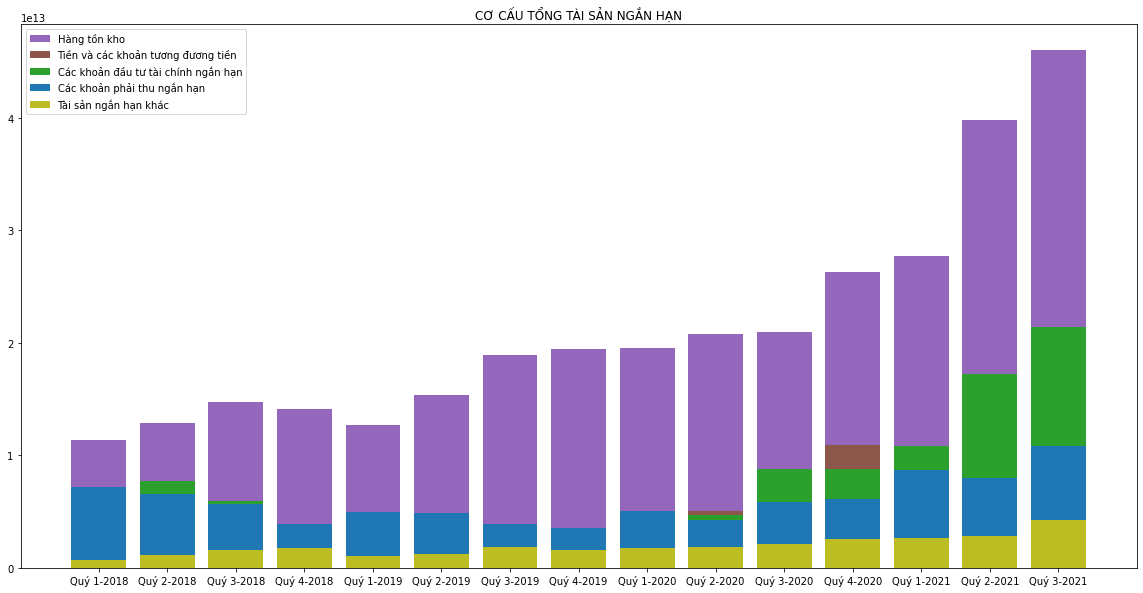

In [ ]:
plt.figure(figsize=(20, 10))

plt.bar(data4.keys(),data4_values,color='tab:purple')
plt.bar(data1.keys(),data1_values,color='tab:brown')
plt.bar(data2.keys(),data2_values,color='tab:green')
plt.bar(data3.keys(),data3_values,color='tab:blue')
plt.bar(data5.keys(),data5_values,color='tab:olive')

plt.title('CƠ CẤU TỔNG TÀI SẢN NGẮN HẠN')
plt.legend(['Hàng tồn kho', 'Tiền và các khoản tương đương tiền', 'Các khoản đầu tư tài chính ngắn hạn','Các khoản phải thu ngắn hạn','Tài sản ngắn hạn khác'])
plt.show()

In [ ]:
#Lấy dữ liệu Các khoản phải thu dài hạn
data1_2018 = cdkt_2018[0:].iloc[18][1:]
data1_2019 = cdkt_2019[0:].iloc[18][1:]
data1_2020 = cdkt_2020[0:].iloc[18][1:]
data1_2021 = cdkt_2021[0:].iloc[18][1:]

#data1 dùng để hợp nhất các dữ liệu Các khoản phải thu dài hạn
data1 = [data1_2018,data1_2019,data1_2020,data1_2021]
data1 = pd.concat(data1)
data1_values = []
for i in data1.values:
  new = i.replace(',', '')
  data1_values.append(int(new))

#Lấy dữ liệu Tài sản cố định
data2_2018 = cdkt_2018[0:].iloc[21][1:]
data2_2019 = cdkt_2019[0:].iloc[21][1:]
data2_2020 = cdkt_2020[0:].iloc[21][1:]
data2_2021 = cdkt_2021[0:].iloc[21][1:]

#data2 dùng để hợp nhất Tài sản cố định
data2 = [data2_2018,data2_2019,data2_2020,data2_2021]
data2 = pd.concat(data2)
data2_values = []
for i in data2.values:
  new = i.replace(',', '')
  data2_values.append(int(new))

#Lấy dữ liệu Bất động sản đầu tư
data3_2018 = cdkt_2018[0:].iloc[28][1:]
data3_2019 = cdkt_2019[0:].iloc[28][1:]
data3_2020 = cdkt_2020[0:].iloc[28][1:]
data3_2021 = cdkt_2021[0:].iloc[28][1:]

#data3 dùng để hợp nhất Bất động sản đầu tư
data3 = [data3_2018,data3_2019,data3_2020,data3_2021]
data3 = pd.concat(data3)
data3_values = []
for i in data3.values:
  new = i.replace(',', '')
  data3_values.append(int(new))

#Lấy dữ liệu Tài sản dở dang dài hạn
data4_2018 = cdkt_2018[0:].iloc[31][1:]
data4_2019 = cdkt_2019[0:].iloc[31][1:]
data4_2020 = cdkt_2020[0:].iloc[31][1:]
data4_2021 = cdkt_2021[0:].iloc[31][1:]

#data4 dùng để hợp nhất Tài sản dở dang dài hạn
data4 = [data4_2018,data4_2019,data4_2020,data4_2021]
data4 = pd.concat(data4)
data4_values = []
for i in data4.values:
  new = i.replace(',', '')
  data4_values.append(int(new))

#Lấy dữ liệu Đầu tư tài chính dài hạn
data5_2018 = cdkt_2018[0:].iloc[34][1:]
data5_2019 = cdkt_2019[0:].iloc[34][1:]
data5_2020 = cdkt_2020[0:].iloc[34][1:]
data5_2021 = cdkt_2021[0:].iloc[34][1:]

#data5 dùng để hợp nhất Đầu tư tài chính dài hạn
data5 = [data5_2018,data5_2019,data5_2020,data5_2021]
data5 = pd.concat(data5)
data5_values = []
for i in data5.values:
  new = i.replace(',', '')
  data5_values.append(int(new))

#Lấy dữ liệu Tài sản dài hạn khác
data6_2018 = cdkt_2018[0:].iloc[38][1:]
data6_2019 = cdkt_2019[0:].iloc[38][1:]
data6_2020 = cdkt_2020[0:].iloc[38][1:]
data6_2021 = cdkt_2021[0:].iloc[38][1:]

#data5 dùng để hợp nhất Tài sản dài hạn khác
data6 = [data6_2018,data6_2019,data6_2020,data6_2021]
data6 = pd.concat(data6)
data6_values = []
for i in data6.values:
  new = i.replace(',', '')
  data6_values.append(int(new))

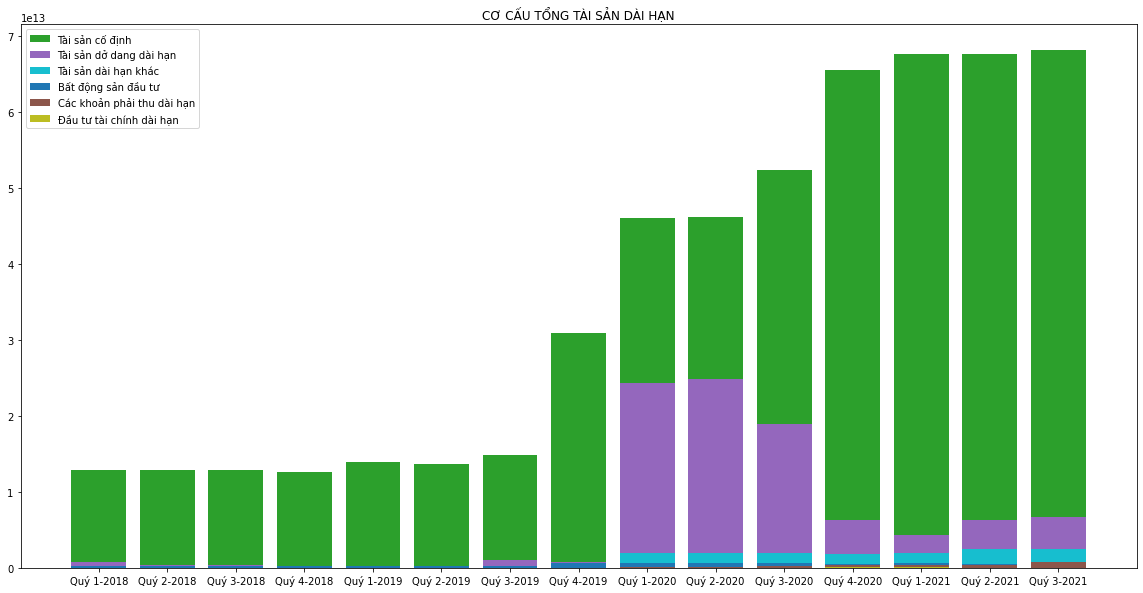

In [ ]:
plt.figure(figsize=(20, 10))

plt.bar(data2.keys(),data2_values,color='tab:green')
plt.bar(data4.keys(),data4_values,color='tab:purple')
plt.bar(data6.keys(),data6_values,color='tab:cyan')
plt.bar(data3.keys(),data3_values,color='tab:blue')
plt.bar(data1.keys(),data1_values,color='tab:brown')
plt.bar(data5.keys(),data5_values,color='tab:olive')

plt.title('CƠ CẤU TỔNG TÀI SẢN DÀI HẠN')
plt.legend(['Tài sản cố định',
            'Tài sản dở dang dài hạn',
            'Tài sản dài hạn khác',
            'Bất động sản đầu tư',
            'Các khoản phải thu dài hạn',
            'Đầu tư tài chính dài hạn'])
plt.show()